# Bike Sharing

### Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

### Files
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days

### Attribute Information:

The dataset contains the following fields: 

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [1]:
# Import libraries

import numpy as np
import pandas as pd

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

In [2]:
# Read hourly rental data using Pandas
url = 'hour.csv'
bikes = pd.read_csv(url, index_col='instant', parse_dates=True)

# Print first 5 rows of the data
# tabulate(bikes.sample(n=10), showindex=True, headers="keys", tablefmt='psql')
bikes.sample(n=10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
13013,2012-07-01,3,1,7,9,0,0,0,1,0.82,0.7879,0.56,0.0000,51,168,219
3270,2011-05-21,2,0,5,3,0,6,0,1,0.48,0.4697,0.82,0.1045,7,12,19
929,2011-02-11,1,0,2,7,0,5,1,1,0.08,0.1667,0.73,0.0000,1,73,74
15899,2012-10-31,4,1,10,3,0,3,1,2,0.30,0.3182,0.81,0.1045,0,3,3
1021,2011-02-15,1,0,2,5,0,2,1,1,0.22,0.1818,0.32,0.4627,0,4,4
8829,2012-01-08,1,1,1,16,0,0,0,1,0.40,0.4091,0.37,0.2985,58,256,314
12447,2012-06-07,2,1,6,19,0,4,1,1,0.70,0.6364,0.34,0.2836,65,537,602
9441,2012-02-03,1,1,2,6,0,5,1,1,0.24,0.2424,0.65,0.1642,0,88,88
2071,2011-04-01,2,0,4,3,0,5,1,2,0.24,0.2273,0.93,0.2537,0,4,4


In [3]:
bikes['dteday'] = pd.to_datetime(arg=bikes['dteday'], yearfirst=True)
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for c in categorical_cols: 
    bikes[c] = bikes[c].astype('category')

In [4]:
bikes.dtypes

dteday        datetime64[ns]
season              category
yr                  category
mnth                category
hr                  category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

## ============== Basic feature exploration ======================

### Describe features 

In [5]:
# print(tabulate(bikes.describe(include='all'), showindex=True, headers="keys", tablefmt='psql'))
bikes.describe(include='all')

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-08-29 00:00:00,3.0,1.0,7.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


### ---------   Observations on features  -----------------
- No data is missing from any columns
- There are two columns - `casual` and `registered` - that add up to `cnt`. These columns should not be used in the predictive models and are removed from the data.
- There is one col - `dteday` - that has date of rental. It is redundant since year and month are already given separately. We choose to remove this column from the data.

### Create Bikes dataframe

In [6]:
# Create the dataframe bikes for analysis 
# Identify which columns are continuous vs categorical variables
# Do not include columns - casual, registered and dteday based on comment above

continuous_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['mnth', 'hr', 'season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']
output = ['cnt']

bikes = bikes[continuous_features + categorical_features + output]
for cat in categorical_features: 
    bikes[cat] = bikes[cat].astype(str)


### Correlation between features

The plot below shows the pairwise correlation between features

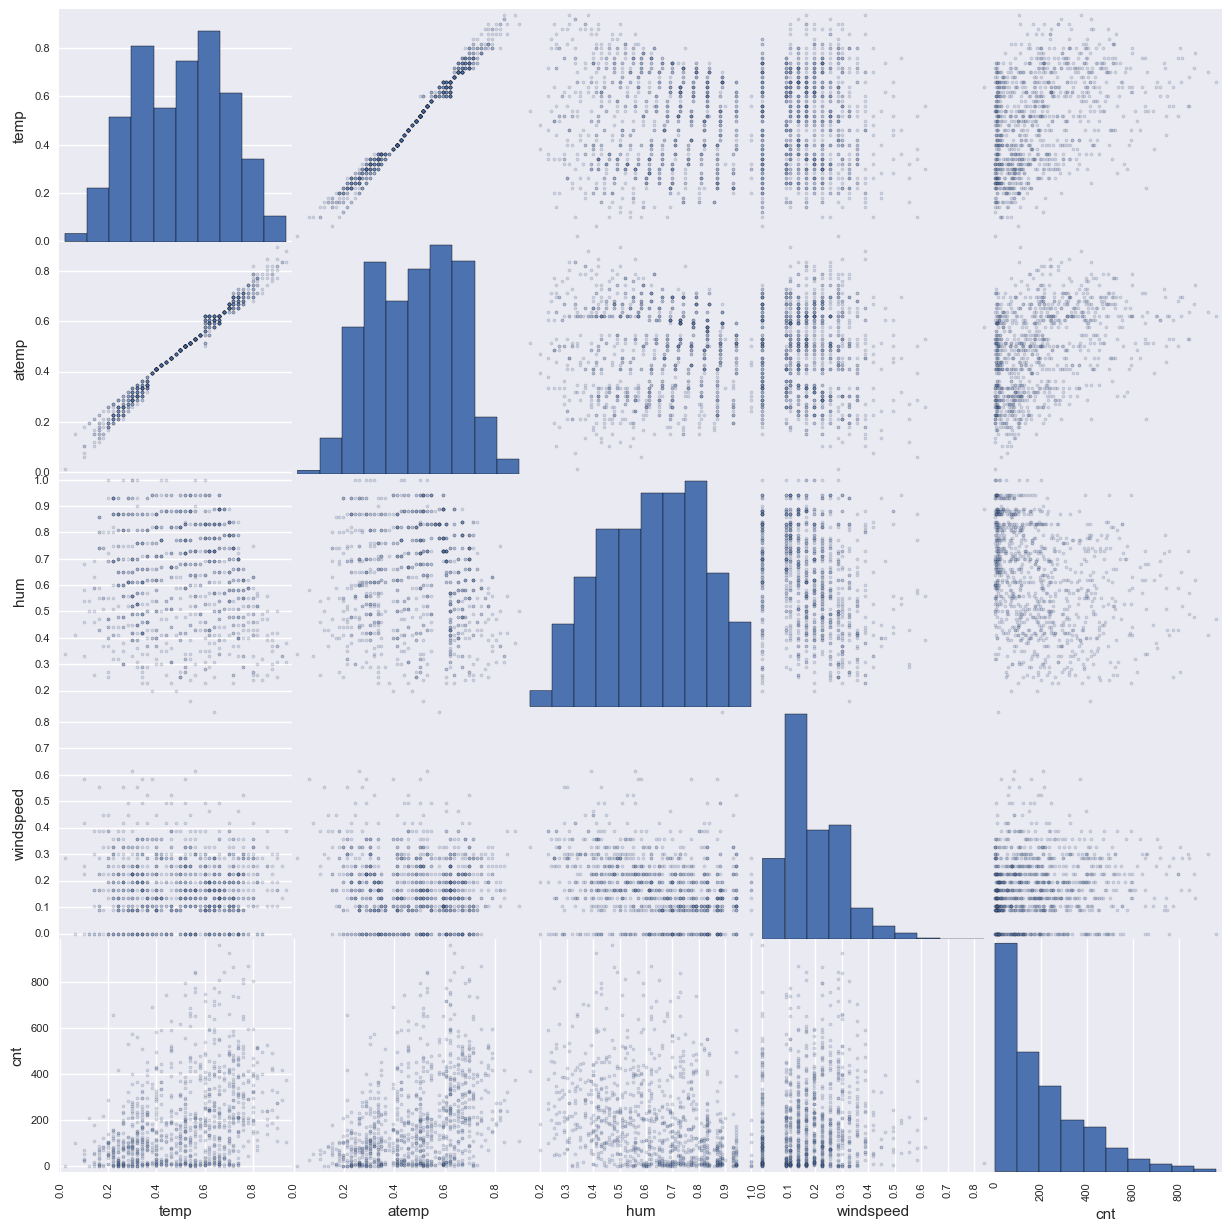

In [47]:
from pandas.tools.plotting import scatter_matrix
f = scatter_matrix(bikes.sample(1000), alpha=0.2, figsize=(15, 15))

### ---------   Observations on correlation plot  ---------------
 
- As expected, `temp` and `atemp` have a strong correlation and contain redundant information
- We choose to remove atemp from the Bikes dataframe


### Update Bikes dataframe 

In [9]:
# Remove temp from the bikes data based on correlation plots
bikes.drop('atemp', axis=1, inplace=True)
bikes['hr'] = bikes['hr'].astype(int)

# After final feature engineering
bikes.head()

ValueError: labels ['atemp'] not contained in axis

### Relationship between bike rentals and temperature/hour

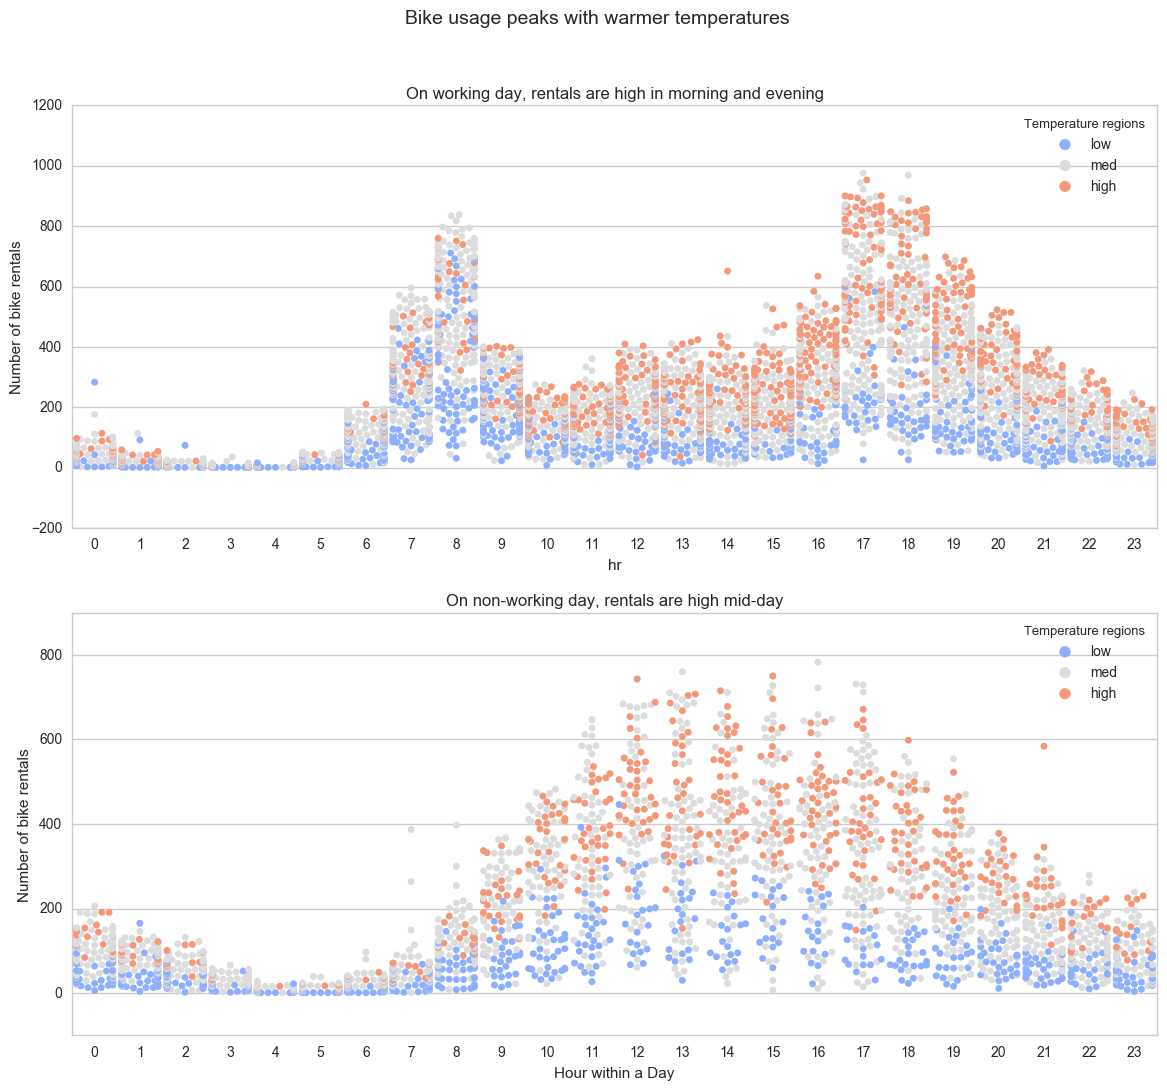

In [36]:
# Construct a swarm plot for analyzing relationship between bike rentals and temperature / hour of the day

# Create bins for the temperature to indicate low, medium, and high
bikes['Temperature regions'] = pd.cut(bikes.temp, [0,0.33,0.66,1], labels=['low', 'med', 'high'])

# Specify settings for the plot
plt.rcParams['figure.figsize']=(14,12)
plt.rcParams['font.size']=14
sns.set_style("whitegrid")
f, (ax1, ax2) = plt.subplots(2)

# Create the actual plots
ax1 = sns.swarmplot(x='hr', y='cnt', hue='Temperature regions', 
                  data=bikes[bikes['workingday'] == '1'].sample(frac=0.5), 
                  palette='coolwarm', ax=ax1)

ax2 = sns.swarmplot(x='hr', y='cnt', hue='Temperature regions', 
                  data=bikes[bikes['workingday'] == '0'].sample(frac=0.5), 
                  palette='coolwarm', ax=ax2)

# Specify titles and labels 
f.suptitle('Bike usage peaks with warmer temperatures')
ax1.set_title('On working day, rentals are high in morning and evening')
ax2.set_title('On non-working day, rentals are high mid-day')
ax2.set(xlabel="Hour within a Day", ylabel="Number of bike rentals")
ax1.set(ylabel="Number of bike rentals")

bikes.drop(['Temperature regions'], axis=1, inplace=True)

### ---------  Observations on swarm plot --------------

- Bike rentals are higher on working days during commute hours (morning around 8 am and evening around 5 pm)
- Bike rentals are higher when the temperature is moderately high or if it's warmer (above the 3rd quartile)
- Conclusion: Temp and Hours are two important features that must be included when training a model


### ====================== Helper Functions and Variables  =============================

In [10]:
# Handle categorical variables in bikes data

# FYI: Linear regression requires that indicator columns be created for each categorical variables
# This process is called dummy encoding

# Create a new dataframe that is a copy of original
bikes_encoded = bikes.copy()

# Create dummy columns for each categorical variable and update in the new dataframe
for cat in categorical_features:
    dummy_cols = pd.get_dummies(bikes_encoded[cat], prefix=cat)

    # Remove the categorical variable from the new dataframe
    bikes_encoded.drop(cat, axis=1, inplace=True)

    # Add the dummy variables to the new dataframe
    bikes_encoded = pd.concat([bikes_encoded, dummy_cols], axis=1)        

In [11]:
# Split the data such that random 20% of it is used as "Evaluation set" or "Test set"
import sklearn as sk
from sklearn.model_selection import train_test_split

def create_train_test_indices(n_data, test_size=0.2):
    all_indices = np.arange(n_data)
    train, test = train_test_split(all_indices, test_size = test_size)
    return train, test

def create_train_test_data(train_indices, test_indices, all_data):
    # Separate features and target variables
    train_X = all_data.iloc[train_indices].drop("cnt", axis=1)
    train_y = all_data.iloc[train_indices]["cnt"]
    test_X = all_data.iloc[test_indices].drop("cnt", axis=1)
    test_y = all_data.iloc[test_indices]["cnt"]    
    return train_X, train_y, test_X, test_y

In [12]:
def rae(true_val, pred_val): 
    true_mean = true_val.mean()
    diff = np.abs(true_val - pred_val)
    return diff.sum() / np.abs(true_val - true_mean).sum()

def rrse(true_val, pred_val): 
    true_mean = true_val.mean()
    diff = np.square(true_val - pred_val)
    return diff.sum() / np.square(true_val - true_mean).sum()
    
def cc(true_val, pred_val): 
    true_mean, pred_mean = true_val.mean(), pred_val.mean()
    spa = ((true_val - true_mean) * (pred_val - pred_mean)).sum()
    sa = np.square(true_val - true_mean).sum()
    sp = np.square(pred_val - pred_mean).sum()
    return spa / np.sqrt(sa * sp)

In [13]:
# Calculate and print metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as R2

# Print predictions
def print_pred_summary(test_pred_y):
    print "\n-----------------------------------------------------------------"
    print "Summary of predictions for test data:\n"
    print pd.DataFrame(test_pred_y, columns=['Prediction']).describe() 

# Calculate and print R2
def print_R2(train_pred_y, train_y):
    print "\n-----------------------------------------------------------------"
    print 'R-Square for training data:\t', R2(train_pred_y, train_y)

    # Calculate and print MAE - Mean Absolute Error
def print_all_metrics(train_pred_y, train_y, test_pred_y, test_y):
    print "\n-----------------------------------------------------------------"
    print "MAE for training data:\t\t", mae(train_y, train_pred_y)
    print "MAE for test data:\t\t", mae(test_y, test_pred_y)
    print "\n-----------------------------------------------------------------"
    print "RAE for training data:\t\t", rae(train_y, train_pred_y)
    print "RAE for test data:\t\t", rae(test_y, test_pred_y)
    print "\n-----------------------------------------------------------------"
    print "RRSE for training data:\t\t", rrse(train_y, train_pred_y)
    print "RRSE for test data:\t\t", rrse(test_y, test_pred_y)
    print "\n-----------------------------------------------------------------"
    print "CC for training data:\t\t", cc(train_y, train_pred_y)
    print "CC for test data:\t\t", cc(test_y, test_pred_y)
    print "\n-----------------------------------------------------------------"


In [14]:
# Build train and test indices
train_indices, test_indices = create_train_test_indices(len(bikes), test_size=0.2)

# Build train and test datasets
train_X, train_y, test_X, test_y = create_train_test_data(train_indices, test_indices, bikes)

# Encode the data and split it
train_encoded_X, train_encoded_y, test_encoded_X, test_encoded_y = create_train_test_data(train_indices, test_indices, bikes_encoded)

### ====================== Linear Regression ========================================

In [15]:
train_encoded_X.head()

,temp,hum,windspeed,mnth_1,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
instant,,,,,,,,,,,,,,,,,,,,,
11896,0.64,0.73,0.1343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7799,0.48,0.44,0.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
9897,0.32,0.70,0.0896,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4103,0.72,0.45,0.1642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
867,0.24,0.32,0.4478,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [16]:
#----------------------------------------------------------------------------------------
# Model
#----------------------------------------------------------------------------------------

from sklearn.linear_model import LinearRegression

# Initiate and train model
lin_regr = LinearRegression(normalize=True)
lin_regr.fit(train_encoded_X, train_encoded_y)

print "\n----------------------------------------------"
print "Linear Regression Model details:"
print(lin_regr)

#----------------------------------------------------------------------------------------
# Predict
#----------------------------------------------------------------------------------------

train_pred_y = lin_regr.predict(train_encoded_X)
test_pred_y = lin_regr.predict(test_encoded_X)

#----------------------------------------------------------------------------------------
# Analyze
#----------------------------------------------------------------------------------------

# Print R-square for training data
print_R2(train_pred_y, train_y)

# Print summary of test predictions
print_pred_summary(test_pred_y)

# Print MAE for both training and test data
print_all_metrics(train_pred_y, train_y, test_pred_y, test_y)


----------------------------------------------
Linear Regression Model details:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

-----------------------------------------------------------------
R-Square for training data:	0.549881144599

-----------------------------------------------------------------
Summary of predictions for test data:

        Prediction
count  3476.000000
mean    189.626618
std     150.005268
min    -190.750000
25%      79.156250
50%     190.250000
75%     295.875000
max     611.000000

-----------------------------------------------------------------
MAE for training data:		75.106110192
MAE for test data:		76.7267333142

-----------------------------------------------------------------
RAE for training data:		0.527080069852
RAE for test data:		0.540324809751

-----------------------------------------------------------------
RRSE for training data:		0.311635504592
RRSE for test data:		0.324878390405

---------------------------------

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


### ---------  Analysis for Linear Regression  ------------

- Linear regression prediction includes negative output (which is not valid for `cnt`)
- R2 is close to 0.5, which implies that only 50% of the variance in the data is modeled by the regressor. 
#### Next step:
- Try other models to predict cnt, like Decision Tree to model greater variability in the data.


### ====================== Decision Tree ====================================

In [17]:
#----------------------------------------------------------------------------------------
# Model
#----------------------------------------------------------------------------------------
from sklearn.tree import DecisionTreeRegressor
    
# Initiate Model
dec_tree = DecisionTreeRegressor(max_depth=15)
    
# Train the model
dec_tree.fit(train_X, train_y)

print "\n----------------------------------------------"
print "Decision Tree Model details:"
print(dec_tree)

#----------------------------------------------------------------------------------------
# Predict
#----------------------------------------------------------------------------------------

train_pred_y = np.round(dec_tree.predict(train_X))
test_pred_y = np.round(dec_tree.predict(test_X))

#----------------------------------------------------------------------------------------
# Analyze
#----------------------------------------------------------------------------------------

# Print summary of test predictions
print_pred_summary(test_pred_y)

# Metrics
print_all_metrics(train_pred_y, train_y, test_pred_y, test_y)


----------------------------------------------
Decision Tree Model details:
DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

-----------------------------------------------------------------
Summary of predictions for test data:

        Prediction
count  3476.000000
mean    193.051208
std     180.741863
min       1.000000
25%      43.000000
50%     150.000000
75%     287.000000
max     968.000000

-----------------------------------------------------------------
MAE for training data:		9.28173775444
MAE for test data:		35.1777905639

-----------------------------------------------------------------
RAE for training data:		0.0651374298502
RAE for test data:		0.247728948867

-----------------------------------------------------------------
RRSE for trai

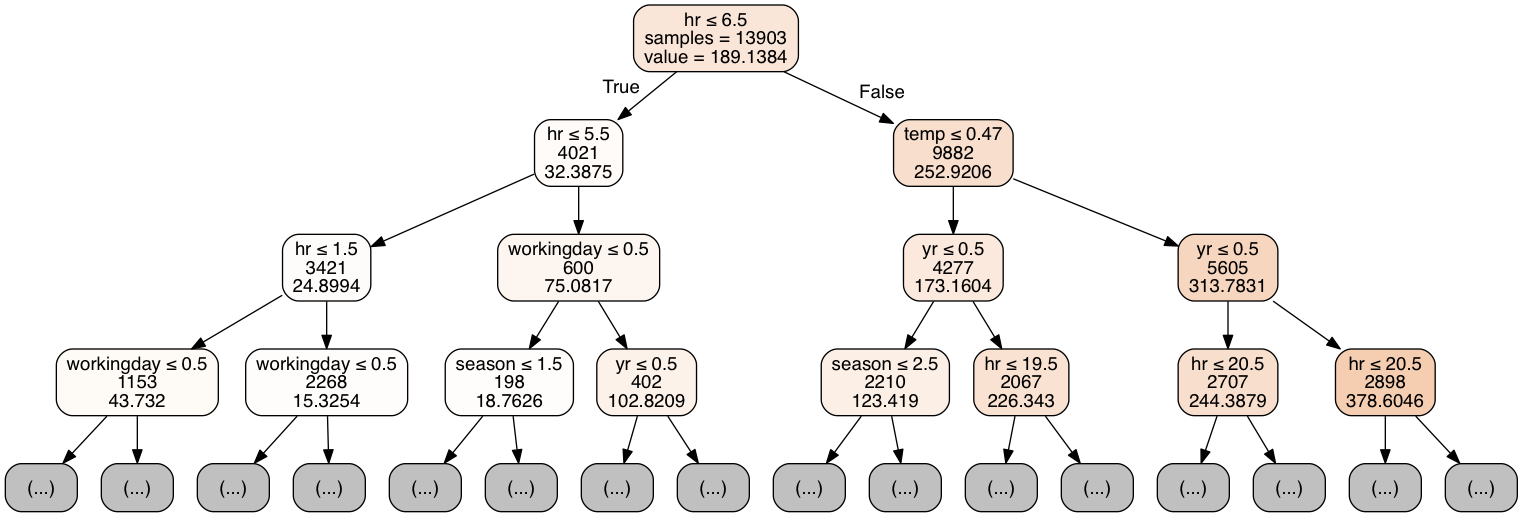

In [18]:
# Display Decision Tree to get an idea of how it splits on features

from IPython.display import Image  
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(dec_tree, out_file=None, max_depth=3, label='root', 
                                feature_names=train_X.columns, impurity=False,
                                filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

### ---------  Analysis for Decision Tree  ------------

- The MAE is much lower with a single Decision tree than with Linear regression.
- There is, however, some overfitting since training MAE is much lower than test MAE. We can alleviate some of that overfitting by averaging over an ensemble.
#### Next step:
- Use Random Forest to improve the MAE while not overfitting. 

### ====================== Random Forest ====================================

In [19]:
#----------------------------------------------------------------------------------------
# Model
#----------------------------------------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor

# Initiate Model
rand_forest = RandomForestRegressor(n_estimators=20, max_depth=15)

# Train the model
rand_forest.fit(train_X, train_y)
print "\n----------------------------------------------"
print "Random Forest Model details:"
print(rand_forest)


#----------------------------------------------------------------------------------------
# Predict
#----------------------------------------------------------------------------------------

train_pred_y = np.round(rand_forest.predict(train_X))
test_pred_y = np.round(rand_forest.predict(test_X))

#----------------------------------------------------------------------------------------
# Analyze
#----------------------------------------------------------------------------------------

# Print summary of test predictions
print_pred_summary(test_pred_y)

# Metrics
print_all_metrics(train_pred_y, train_y, test_pred_y, test_y)


----------------------------------------------
Random Forest Model details:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

-----------------------------------------------------------------
Summary of predictions for test data:

        Prediction
count  3476.000000
mean    192.254028
std     176.228378
min       1.000000
25%      47.000000
50%     153.000000
75%     282.000000
max     899.000000

-----------------------------------------------------------------
MAE for training data:		13.4596849601
MAE for test data:		27.2396432681

-----------------------------------------------------------------
RAE for training data:		0.094457450543
RAE for test data:		0.191826947803

----------

### ---------  Analysis for Random Forest  ------------

- We observe that the MAE has improved with using 20 trees. 
- It's still not clear on how many trees to use - the training MAE will decrease with more trees but we don't want to overfit once again. 
#### Next step:
-  Peform cross-validation with Random Forest to decide how many trees to use in the forest.

### ====================== Random Forest with Cross Validation  ===========================


----------------------------------------------
Average validation score:
For 5 trees is -0.199639025967
For 15 trees is -0.186095046106
For 25 trees is -0.183435091314
For 35 trees is -0.181072615182
For 45 trees is -0.181344800419
For 55 trees is -0.181488530141
For 65 trees is -0.180342758633


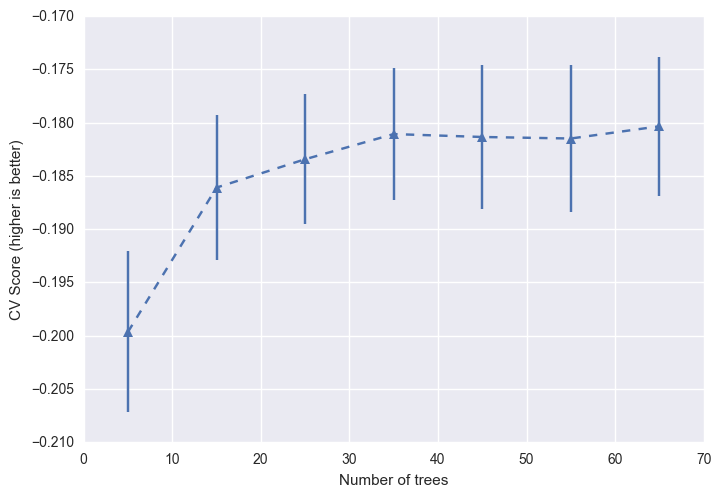

In [20]:
#----------------------------------------------------------------------------------------
# Model
#----------------------------------------------------------------------------------------

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor

# Specify parameters for 10-fold cross validation
kfold = model_selection.KFold(n_splits=10, 
                              random_state=1)

print "\n----------------------------------------------"
print "Average validation score:"
cv_mean_scores = []
for n_trees in range(5, 71, 10):
    # Initiate Model
    rand_forest_cv = RandomForestRegressor(n_estimators=n_trees, 
                                            max_depth=20, 
                                            n_jobs=4)
    # Calculate and print cross-validation score
    results = model_selection.cross_val_score(rand_forest_cv, train_X, train_y, cv=kfold, 
                                              scoring=metrics.make_scorer(rae, greater_is_better=False))
    print("For {0} trees is {1}".format(n_trees, results.mean()))
    cv_mean_scores.append((n_trees, results.mean(), results.std()))

x, y, e = zip(*cv_mean_scores)
plt.errorbar(x, y, e, linestyle='dashed', marker='^')
plt.xlabel("Number of trees")
plt.ylabel("CV Score (higher is better)")

In [21]:
# Use the lowest 'n_trees' that is within 1 std deviation of the highest value 
# to retrain the model 
rand_forest_cv = RandomForestRegressor(n_estimators=25,
                                       criterion='mse',
                                        max_depth=20, 
                                        n_jobs=3)
rand_forest_cv.fit(train_X, train_y)

print "\n----------------------------------------------"
print "Random Forest Model with Cross-Validation details:"
print(rand_forest_cv)

#----------------------------------------------------------------------------------------
# Predict
#----------------------------------------------------------------------------------------

train_pred_y = np.round(rand_forest_cv.predict(train_X))
test_pred_y = np.round(rand_forest_cv.predict(test_X))

#----------------------------------------------------------------------------------------
# Analyze
#----------------------------------------------------------------------------------------

# Print summary of test predictions
print_pred_summary(test_pred_y)

# Metrics
print_all_metrics(train_pred_y, train_y, test_pred_y, test_y)


----------------------------------------------
Random Forest Model with Cross-Validation details:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=3, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

-----------------------------------------------------------------
Summary of predictions for test data:

        Prediction
count  3476.000000
mean    192.305524
std     176.121356
min       1.000000
25%      49.000000
50%     152.500000
75%     280.250000
max     912.000000

-----------------------------------------------------------------
MAE for training data:		10.2239804359
MAE for test data:		26.6392405063

-----------------------------------------------------------------
RAE for training data:		0.0717499056805
RAE for test data:		0.1

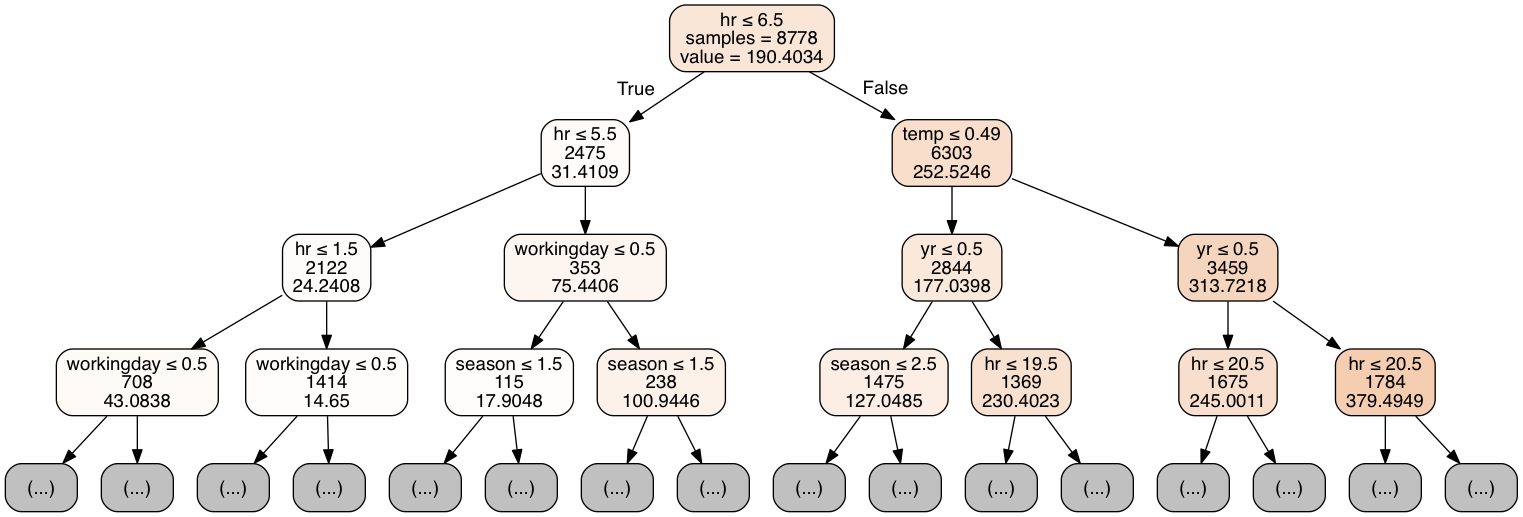

In [22]:
import random
from sklearn import tree

random_tree = random.choice(rand_forest_cv.estimators_)
dot_data = tree.export_graphviz(random_tree, out_file=None, max_depth=3, label='root', 
                                feature_names=train_X.columns, impurity=False,
                                filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### ---------  Analysis for Random Forest with Cross Validation ------------

- We observe that the validation score does not change much from 50 to 100 trees. Hence we build our final model with 50 trees. 

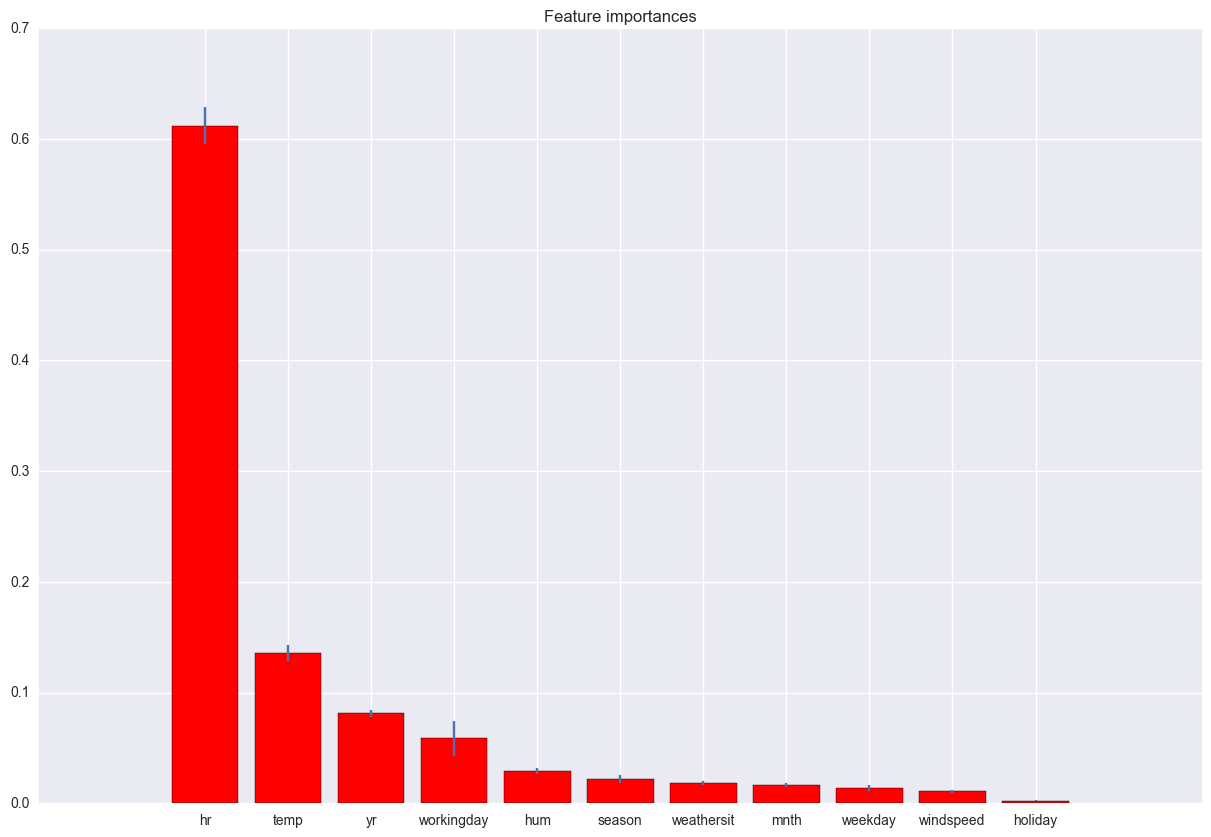

In [23]:
# Feature Impotance for Random Forest with Cross Validation

importances = rand_forest_cv.feature_importances_
std_errs = np.std([tree.feature_importances_ for tree in rand_forest_cv.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
labels = train_X.columns

# # Print the feature ranking
# print("Feature : Importance")

# for f, name in enumerate(labels):
#     print("%s: %f" % (name, importances[f]))

# Plot the feature importances of the forest
f = plt.figure(figsize=(15, 10))
plt.title("Feature importances")
ax = plt.bar(range(len(labels)), importances[indices],
       color="r", yerr=std_errs[indices], align="center")
plt.xticks(range(len(labels)), labels[indices])
plt.show()

### ---------  Observation about important features ------------

-  Random forest provides an MAE ~ 26 on test data. This is a reasonable prediction error for our data. We can also see from the plot above which features are important in the prediction. The top 4 important features in descending order are *hr* (which hour was the bike rented), *temp* (temperature at the time), *year* (rental year), and *workingday* (whether the day was a working day or not). 

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=1000, 
                                max_depth=3,
                                learning_rate=0.8)
gbr.fit(train_X, train_y)

print "\n----------------------------------------------"
print "Gradient Boosted Regression Trees:"
print(gbr)

#----------------------------------------------------------------------------------------
# Predict
#----------------------------------------------------------------------------------------

train_pred_y = np.round(gbr.predict(train_X))
test_pred_y = np.round(gbr.predict(test_X))

#----------------------------------------------------------------------------------------
# Analyze
#----------------------------------------------------------------------------------------

# Print summary of test predictions
print_pred_summary(test_pred_y)

# Metrics
print_all_metrics(train_pred_y, train_y, test_pred_y, test_y)


----------------------------------------------
Gradient Boosted Regression Trees:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.8, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

-----------------------------------------------------------------
Summary of predictions for test data:

        Prediction
count  3476.000000
mean    191.438435
std     177.434903
min    -148.000000
25%      45.000000
50%     151.000000
75%     286.000000
max     926.000000

-----------------------------------------------------------------
MAE for training data:		20.7955117601
MAE for test data:		29.8619102417

-----------------------------------------------------------------
RAE 

### ---------- Observation about accuracy of the models ------------

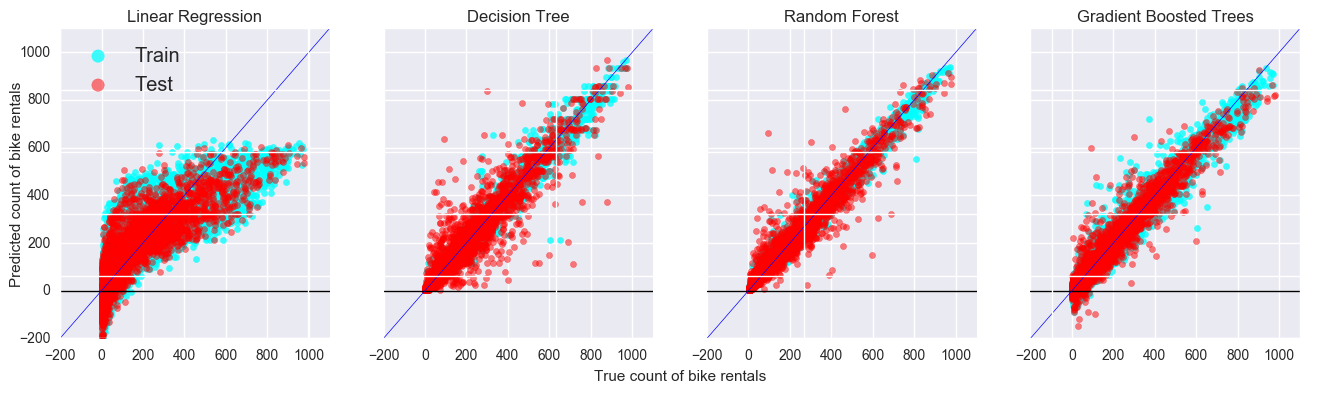

In [40]:
all_models = [lin_regr, dec_tree, rand_forest_cv, gbr]
all_titles = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosted Trees']
n_models = len(all_models)
fig, axes = plt.subplots(1, n_models, sharex=True, sharey=True, figsize=(n_models**2, n_models))

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.xlabel('True count of bike rentals')
plt.ylabel('Predicted count of bike rentals')

for index, (model, title) in enumerate(zip(all_models, all_titles)):
    axes[index].grid(True)
    axes[index].set_xlim(-200,1100)
    axes[index].set_ylim(-200,1100)
    
    if model is lin_regr: 
        tr_X, tr_y, te_X, te_y = train_encoded_X, train_encoded_y, test_encoded_X, test_encoded_y
    else: 
        tr_X, tr_y, te_X, te_y = train_X, train_y, test_X, test_y

    axes[index].axhline(0, color='black', linewidth=1)
#     axes[index].axvline(0, color='black', linewidth=0.75)

    a = axes[index].scatter(tr_y, model.predict(tr_X), alpha=0.75, color='cyan', label='Train')
    b = axes[index].scatter(te_y, model.predict(te_X), alpha=0.5, color='red', label='Test')
    axes[index].set_title(title)
    x = np.linspace(*axes[index].get_xlim())
    axes[index].plot(x, x, color='blue', linewidth=0.5)
plt.legend([a, b],["Train", "Test"], loc='upper left', fontsize='large', markerscale=2)